In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
tcms = pd.read_csv('tu_cara_me_suena_v2.csv')

In [4]:
tcms.head(20)

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,final,total,j5
0,1,1,"Born This Way, de Lady Gaga",Angy,12,12.0,10,12,0,Toñi,NaN,56,0
1,1,1,"Pena, penita, pena, de Lola Flores",Toñi Salazar,10,10.0,12,10,0,Angy,NaN,52,0
2,1,1,"Amante bandido, de Miguel Bosé",Josema Yuste,8,9.0,8,8,0,Julio,NaN,38,0
3,1,1,"Vivir así es morir de amor, de Camilo Sesto",Francisco,7,8.0,9,7,0,Angy,NaN,31,0
4,1,1,"With or Without You, de Bono (U2)","Julio Iglesias, Jr.",5,5.0,5,5,0,Sylvia,NaN,30,0
5,1,1,"En el amor todo es empezar, de Raffaella Carrá",Carolina Ferre,9,6.0,7,6,0,Toñi,NaN,28,0
6,1,1,"Ven a bailar, de Jennifer Lopez",Sylvia Pantoja,6,4.0,6,4,0,Josema,NaN,25,0
7,1,1,"19 días y 500 noches, de Joaquín Sabina",Santiago Segura,4,7.0,4,9,0,Julio,NaN,24,0
8,1,2,"Cabaret, de Liza Minnelli (Cabaret)",Sylvia Pantoja,12,10.0,10,12,0,Santiago,0.0,68,9
9,1,2,"Private Dancer, de Tina Turner","Julio Iglesias, Jr.",9,12.0,12,10,0,Santiago,0.0,60,12


In [5]:
tcms.j4.value_counts()

5     119
12    118
10    118
9     118
8     118
7     118
6     118
4     112
11     95
Name: j4, dtype: int64

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
tcms.groupby(['temporada','programa']).size()

temporada  programa
1          1           8
           2           8
           3           8
           4           8
           5           8
           6           8
           7           8
           8           8
           9           8
2          1           8
           2           8
           3           8
           4           8
           5           8
           6           8
           7           8
           8           8
           9           8
           10          8
           11          8
           12          8
           13          8
           14          7
3          1           9
           2           9
           3           9
           4           9
           5           9
           6           9
           7           9
           8           9
           9           9
           10          9
           11          9
           12          9
           13          9
           14          9
           15          9
           16          9
     

In [8]:
tcms.j1 = tcms.j1.fillna(0).astype(int)

In [9]:
tcms.j2 = tcms.j2.fillna(0).astype(int)

In [10]:
tcms.j3 = tcms.j3.fillna(0).astype(int)

In [11]:
tcms.j4 = tcms.j4.fillna(0).astype(int)

In [12]:
tcms.publico = tcms.publico.fillna(0).astype(int)

In [13]:
import re

In [14]:
cancion = re.compile('(.*?),?\s*de\s*([A-Z]{1}.*)')

In [61]:
tcms.loc[403,'cancion']

'La gozadera, de Alexander Delgado Hernández (Gente de Zona) con Xuso Jones como Marc Anthony (Trae un amigo)'

In [62]:
cancion.search(tcms.loc[403,'cancion']).groups()

('La gozadera',
 'Alexander Delgado Hernández (Gente de Zona) con Xuso Jones como Marc Anthony (Trae un amigo)')

In [63]:
cancion.search('Sarandonga, de Lolita').groups()

('Sarandonga', 'Lolita')

In [56]:
tcms.cancion.str.extract('\((Trae un amigo|Sorpresa|Training|Original|Dos|Reto|Te lo robo).*\)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1029,Trae un amigo
1030,NaN
1031,NaN
1032,Te lo robo


In [129]:
def titulo(x):
    if cancion.match(x):
        titulo = cancion.search(x).groups()[0]
    else:
        titulo = None
    return titulo

In [130]:
def autor(x):
    if cancion.match(x):
        autor = cancion.search(x).groups()[1]
    else:
        autor = None
    return autor

In [215]:
tcms['titulo'] = tcms.cancion.apply(titulo)

In [216]:
tcms['autor'] = tcms.cancion.apply(autor)

In [217]:
tcms['especiales'] = tcms.cancion.str.extract('\((Trae un amigo|Sorpresa|Training|Original|Dos|Reto|Te lo robo).*\)')

In [170]:
tcms.head()

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,final,total,j5,titulo,autor,especiales
0,1,1,"Born This Way, de Lady Gaga",Angy,12,12,10,12,0,Toñi,NaN,56,0,Born This Way,Lady Gaga,NaN
1,1,1,"Pena, penita, pena, de Lola Flores",Toñi Salazar,10,10,12,10,0,Angy,NaN,52,0,"Pena, penita, pena",Lola Flores,NaN
2,1,1,"Amante bandido, de Miguel Bosé",Josema Yuste,8,9,8,8,0,Julio,NaN,38,0,Amante bandido,Miguel Bosé,NaN
3,1,1,"Vivir así es morir de amor, de Camilo Sesto",Francisco,7,8,9,7,0,Angy,NaN,31,0,Vivir así es morir de amor,Camilo Sesto,NaN
4,1,1,"With or Without You, de Bono (U2)","Julio Iglesias, Jr.",5,5,5,5,0,Sylvia,NaN,30,0,With or Without You,Bono (U2),NaN


In [171]:
concursantes = pd.read_csv('concursantes.csv')

In [172]:
concursantes.head()

,artista,pais,region,ciudad,sexo,edad,categoria
0,Angy,España,Canarias,Palma,F,21,Cantante
1,Santiago Segura,España,Madrid,Madrid,M,46,Cine
2,"Julio Iglesias, Jr.",España,Madrid,Madrid,M,38,Cantante
3,Sylvia Pantoja,España,Andalucía,Sevilla,F,42,Cantante
4,Toñi Salazar,España,Extremadura,Badajoz,F,48,Cantante


In [173]:
concursantes['artista'] = concursantes['artista'].str.strip()

In [174]:
concursantes['ciudad'] = concursantes['ciudad'].str.strip()

In [175]:
concursantes['region'] = concursantes['region'].str.strip()

In [176]:
concursantes.to_csv('concursantes.csv', index=False)

In [20]:
concursantes = pd.read_csv('concursantes.csv')

In [21]:
list(concursantes.pais.unique())

['España', 'Internacional']

In [218]:
tcms_total = pd.merge(tcms, concursantes, on='artista')

In [219]:
tcms_total.to_csv('tcms_total.csv', index=False)

In [16]:
tcms_total = pd.read_csv('tcms_total.csv')

In [17]:
tcms_total.head()

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
0,1,1,"Born This Way, de Lady Gaga",Angy,12,12,10,12,0,Toñi,...,0,Born This Way,Lady Gaga,NaN,España,Canarias,Palma,F,21,Cantante
1,1,2,"Me gustas mucho, de Rocío Dúrcal",Angy,10,9,6,7,0,Sylvia,...,8,Me gustas mucho,Rocío Dúrcal,NaN,España,Canarias,Palma,F,21,Cantante
2,1,3,Only Girl (In the World) de Rihanna,Angy,9,9,5,7,0,Julio,...,6,Only Girl (In the World),Rihanna,NaN,España,Canarias,Palma,F,21,Cantante
3,1,4,Girls Just Want to Have Fun de Cyndi Lauper,Angy,12,9,10,10,0,Carolina,...,8,Girls Just Want to Have Fun,Cyndi Lauper,NaN,España,Canarias,Palma,F,21,Cantante
4,1,5,Thriller de Michael Jackson,Angy,7,6,5,7,0,Toñi,...,12,Thriller,Michael Jackson,NaN,España,Canarias,Palma,F,21,Cantante


In [18]:
tcms_total.artista.sort_values().unique()

array(['Adrián Rodríguez', 'Ana Morgade', 'Anabel Alonso', 'Angy',
       'Anna Simon', 'Arturo Valls', 'Beatriz Luengo',
       'Belinda Washington', 'Blas Cantó', 'Brays Efe', 'Canco Rodríguez',
       'Carlos Baute', 'Carolina Ferre', 'Cristina Ramos', 'Daniel Diges',
       'David Amor', 'David Guapo', 'Diana Navarro', 'Edu Soto', 'Edurne',
       'El Monaguillo', 'El Sevilla', 'Esther Arroyo', 'Falete',
       'Florentino Fernández', 'Fran Dieli', 'Francisco', 'Gemeliers',
       'Javier Herrero', 'Jordi Coll', 'Jorge González', 'Josema Yuste',
       'José Corbacho', 'José Manuel Soto', 'Juan Muñoz',
       'Julio Iglesias, Jr.', 'La Terremoto de Alcorcón', 'Llum Barrera',
       'Lorena Gómez', 'Los Chunguitos', 'Lucía Gil', 'Lucía Jiménez',
       'Manu Sánchez', 'Mario Vaquerizo', 'María Isabel',
       'María Villalón', 'María del Monte', 'Melody', 'Mimi Doblas',
       'Miquel Fernández', 'Nerea Rodríguez', 'Pablo Puyol',
       'Pepa Aniorte', 'Raúl Pérez', 'Rocío Madrid', 

In [22]:
concursantes.artista.sort_values()

29            Adrián Rodríguez
28                 Ana Morgade
58               Anabel Alonso
0                         Angy
13                  Anna Simon
10                Arturo Valls
37              Beatriz Luengo
61          Belinda Washington
34                  Blas Cantó
57                   Brays Efe
38             Canco Rodríguez
53                Carlos Baute
6               Carolina Ferre
62              Cristina Ramos
9                 Daniel Diges
51                  David Amor
41                 David Guapo
46               Diana Navarro
26                    Edu Soto
16                      Edurne
67               El Monaguillo
32                  El Sevilla
39               Esther Arroyo
30                      Falete
20        Florentino Fernández
45                  Fran Dieli
7                    Francisco
63                   Gemeliers
15              Javier Herrero
56                  Jordi Coll
64              Jorge González
5                 Josema Yuste
60      

In [23]:
tcms_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temporada   1054 non-null   int64  
 1   programa    1054 non-null   int64  
 2   cancion     1054 non-null   object 
 3   artista     1054 non-null   object 
 4   j1          1054 non-null   int64  
 5   j2          1054 non-null   int64  
 6   j3          1054 non-null   int64  
 7   j4          1054 non-null   int64  
 8   publico     1054 non-null   int64  
 9   bonus       490 non-null    object 
 10  final       1045 non-null   float64
 11  total       1054 non-null   object 
 12  j5          1054 non-null   int64  
 13  titulo      1047 non-null   object 
 14  autor       1047 non-null   object 
 15  especiales  81 non-null     object 
 16  pais        1054 non-null   object 
 17  region      1054 non-null   object 
 18  ciudad      1054 non-null   object 
 19  sexo        1054 non-null  

In [25]:
tcms = pd.read_csv('tcms_total.csv')

In [26]:
tcms.titulo.value_counts()

Torero                                                                                        3
Loca                                                                                          3
Hijo de la luna                                                                               2
I've Got You Under My Skin                                                                    2
La, la, la                                                                                    2
Bailando                                                                                      2
New York, New York                                                                            2
Escándalo                                                                                     2
Marinero de luces                                                                             2
Maria Caipirinha                                                                              2
Perfect                                 

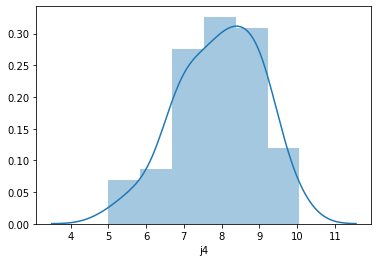

In [27]:
sns.distplot(pd.DataFrame(tcms.groupby('artista')['j4'].mean(), columns=['j4']).sort_values('j4', ascending=False)['j4'])

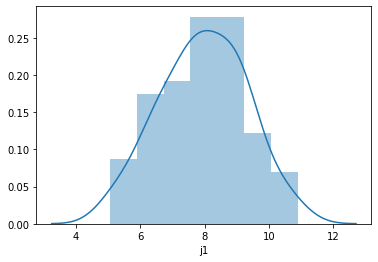

In [196]:
sns.distplot(pd.DataFrame(tcms.groupby('artista')['j1'].mean(), columns=['j1']).sort_values('j1', ascending=False)['j1'])

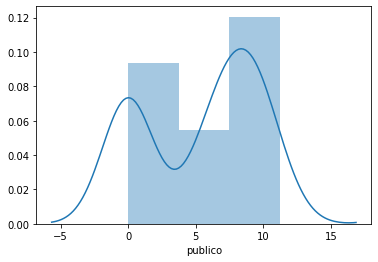

In [195]:
sns.distplot(pd.DataFrame(tcms.groupby('artista')['publico'].mean(), columns=['publico']).sort_values('publico', ascending=False)['publico'])

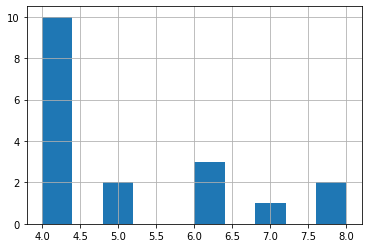

In [90]:
tcms[tcms['j1']<12]['j1'].hist()

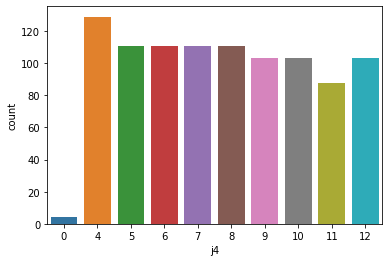

In [135]:
sns.countplot(tcms[tcms['j4']<13]['j4'])

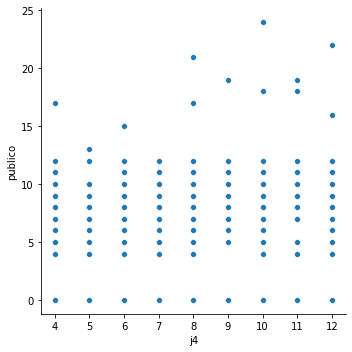

In [202]:
sns.relplot('j4','publico', data=tcms)

In [96]:
tcms.head()

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
0,3,1,"La raja de tu falda, de Estopa",Los Chunguitos,4,4,5,4,0,Ángela,...,0,La raja de tu falda,Estopa,NaN,España,Extremadura,Badajoz,M,56,Cantante
1,3,2,"Resistiré, de Dúo Dinámico",Los Chunguitos,4,4,4,5,0,Florentino,...,0,Resistiré,Dúo Dinámico,NaN,España,Extremadura,Badajoz,M,56,Cantante
2,3,3,"A esa, de Pimpinela",Los Chunguitos,6,6,6,6,0,Melody,...,0,A esa,Pimpinela,NaN,España,Extremadura,Badajoz,M,56,Cantante
3,3,4,"Bandido, de Azúcar Moreno",Los Chunguitos,4,4,4,4,0,José Manuel,...,0,Bandido,Azúcar Moreno,NaN,España,Extremadura,Badajoz,M,56,Cantante
4,3,5,"Son de amores, de Andy y Lucas",Los Chunguitos,4,4,4,4,0,Florentino,...,0,Son de amores,Andy y Lucas,NaN,España,Extremadura,Badajoz,M,56,Cantante


In [28]:
tcms[tcms.artista == 'Xuso Jones']

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
223,3,1,"Laura no está, de Nek",Xuso Jones,9,11,10,11,0,Edurne,...,0,Laura no está,Nek,NaN,España,Murcia,Murcia,M,24,Cantante
224,3,2,"Locked out of heaven, de Bruno Mars",Xuso Jones,8,7,5,4,0,Llum,...,0,Locked out of heaven,Bruno Mars,NaN,España,Murcia,Murcia,M,24,Cantante
225,3,3,"Devuélveme a mi chica, de David Summers (Hombr...",Xuso Jones,10,10,11,12,0,Melody,...,0,Devuélveme a mi chica,David Summers (Hombres G),NaN,España,Murcia,Murcia,M,24,Cantante
226,3,4,"Let me entertain you, de Robbie Williams",Xuso Jones,10,8,12,10,0,Santi,...,0,Let me entertain you,Robbie Williams,NaN,España,Murcia,Murcia,M,24,Cantante
227,3,5,"Rolling in the deep, de Adele",Xuso Jones,7,8,8,7,0,Florentino,...,0,Rolling in the deep,Adele,NaN,España,Murcia,Murcia,M,24,Cantante
228,3,6,"Blurred Lines, de Robin Thicke",Xuso Jones,8,9,12,12,0,José Manuel,...,0,Blurred Lines,Robin Thicke,NaN,España,Murcia,Murcia,M,24,Cantante
229,3,7,"Aquí no hay playa, de Bernardo J. Vázquez (The...",Xuso Jones,12,8,9,9,0,Ángela,...,10,Aquí no hay playa,Bernardo J. Vázquez (The Refrescos),NaN,España,Murcia,Murcia,M,24,Cantante
230,3,8,"This Love, de Adam Levine (Maroon 5)",Xuso Jones,9,10,8,4,0,Los Chunguitos,...,0,This Love,Adam Levine (Maroon 5),NaN,España,Murcia,Murcia,M,24,Cantante
231,3,9,"Toxic, de Britney Spears",Xuso Jones,10,7,9,11,0,Llum,...,0,Toxic,Britney Spears,NaN,España,Murcia,Murcia,M,24,Cantante
232,3,10,"Impossible, de James Arthur",Xuso Jones,11,12,11,12,0,Santi,...,0,Impossible,James Arthur,NaN,España,Murcia,Murcia,M,24,Cantante


In [94]:
tcms[tcms.artista == 'Xuso Jones']

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria


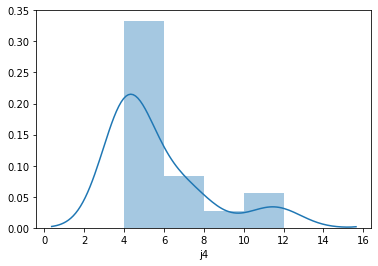

In [29]:

sns.distplot(tcms[tcms.artista == 'Los Chunguitos']['j4'])

In [30]:
import matplotlib.pyplot as plt

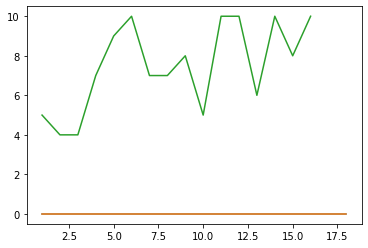

In [31]:
plt.plot(tcms[tcms.artista == 'Xuso Jones']['programa'], tcms[tcms.artista == 'Xuso Jones']['publico'])
plt.plot(tcms[tcms.artista == 'Los Chunguitos']['programa'], tcms[tcms.artista == 'Los Chunguitos']['publico'])
plt.plot(tcms[tcms.artista == 'Ana Morgade']['programa'], tcms[tcms.artista == 'Ana Morgade']['publico'])

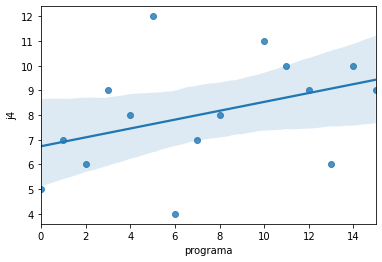

In [161]:
sns.regplot(tcms[tcms.artista == 'Ana Morgade']['programa'], tcms[tcms.artista == 'Ana Morgade']['j4'])

In [33]:
tcms[tcms.publico > 11]

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,j5,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria
365,4,1,"The Edge of Glory, de Lady Gaga",Ruth Lorenzo,11,11,12,10,12,Pablo,...,0,The Edge of Glory,Lady Gaga,NaN,España,Murcia,Las Torres de Cotillas,F,37,Cantante
369,4,5,"Proud Mary, de Tina Turner",Ruth Lorenzo,12,12,12,12,12,Adrián,...,0,Proud Mary,Tina Turner,NaN,España,Murcia,Las Torres de Cotillas,F,37,Cantante
376,4,12,"Rise Like a Phoenix, de Conchita Wurst",Ruth Lorenzo,8,8,9,9,12,Ana,...,0,Rise Like a Phoenix,Conchita Wurst,NaN,España,Murcia,Las Torres de Cotillas,F,37,Cantante
383,4,4,"Part-Time Lover, de Stevie Wonder",Pablo Puyol,11,12,10,11,12,Vicky,...,0,Part-Time Lover,Stevie Wonder,NaN,España,Andalucía,Málaga,M,44,Cine
387,4,8,"Uptown Funk, de Bruno Mars",Pablo Puyol,8,12,10,12,12,Ruth,...,0,Uptown Funk,Bruno Mars,NaN,España,Andalucía,Málaga,M,44,Cine
389,4,10,"Caruso, de Andrea Bocelli",Pablo Puyol,9,7,8,9,12,Silvia,...,0,Caruso,Andrea Bocelli,NaN,España,Andalucía,Málaga,M,44,Cine
392,4,13,"All of Me, de John Legend",Pablo Puyol,8,8,11,7,12,Vicky,...,0,All of Me,John Legend,NaN,España,Andalucía,Málaga,M,44,Cine
393,4,14,"Heroes, de Måns Zelmerlöw",Pablo Puyol,11,12,11,11,12,Ana,...,0,Heroes,Måns Zelmerlöw,NaN,España,Andalucía,Málaga,M,44,Cine
397,4,2,"Algo de mí, de Camilo Sesto",Edu Soto,10,12,8,11,12,Pablo,...,0,Algo de mí,Camilo Sesto,NaN,España,Cataluña,Mataró,M,42,Humorista
401,4,6,"Angelitos negros, de Antonio Machín",Edu Soto,12,12,10,9,12,Sevilla,...,0,Angelitos negros,Antonio Machín,NaN,España,Cataluña,Mataró,M,42,Humorista
